In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop('customer_id', axis=1, inplace=True)

In [5]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
data.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [9]:
data.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

Text(0.5, 1.0, 'Gender')

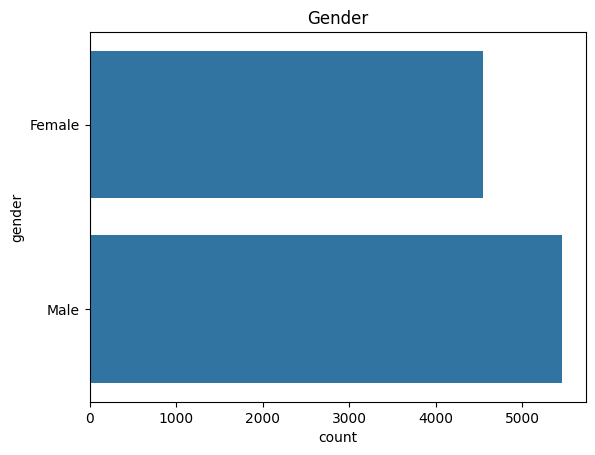

In [11]:
sns.countplot(data['gender'])
xlabel=('Male')
ylabel=('Female')

plt.title('Gender')

In [12]:
data['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


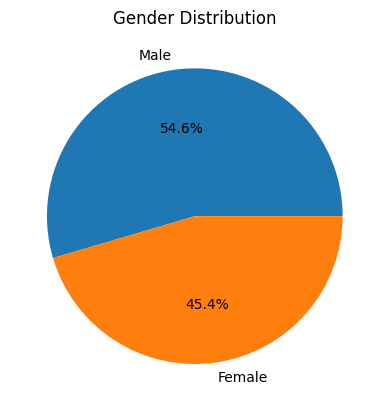

In [13]:
plt.pie(data['gender'].value_counts(),
labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

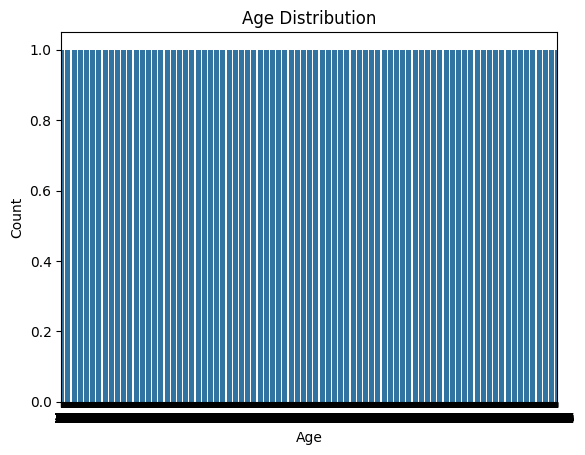

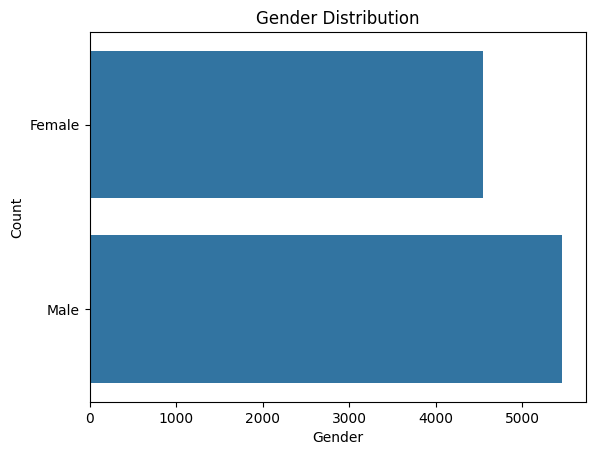

In [14]:
sns.countplot(data['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.countplot(data['gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

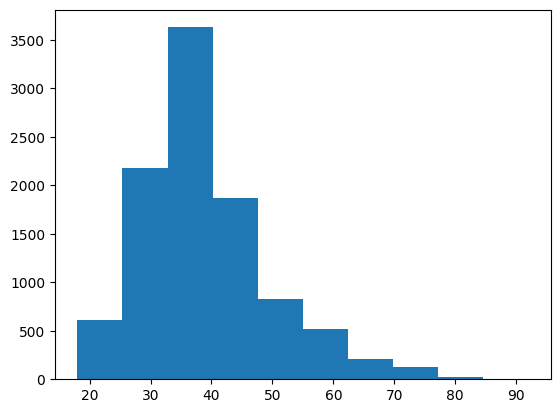

In [15]:
plt.hist(data['age'])

In [16]:
data['age'].min()

18

In [17]:
data['age'].max()

92

In [18]:
data['age'].std()

10.487806451704591

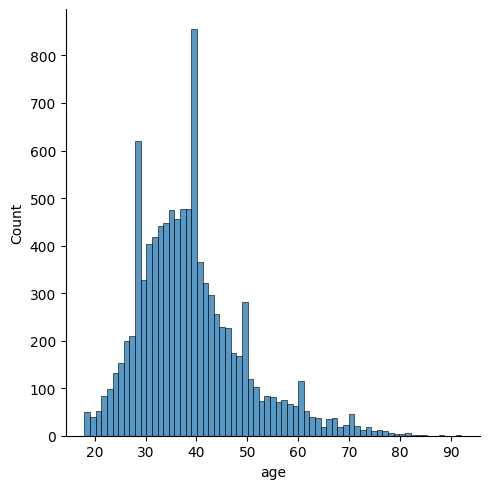

In [19]:
sns.displot(data['age'])

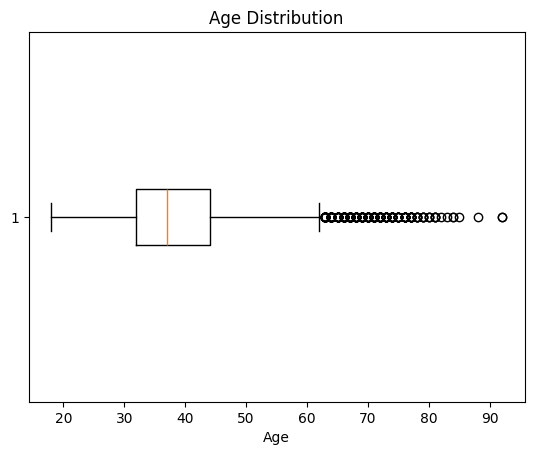

In [20]:
plt.boxplot(data['age'], vert=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [21]:
data.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
data['gender'] = data['gender'].map({'Male':1, 'Female':0})

In [23]:
data['country'].value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


In [24]:
data['estimated_salary'].value_counts()

,count
estimated_salary,
24924.92,2
121505.61,1
89874.82,1
72500.68,1
182692.80,1
...,...
188377.21,1
55902.93,1
4523.74,1


In [25]:
data['country'] = data['country'].map({'France':1,'Germany':0,'Spain':2})

In [26]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


In [27]:
x = data.drop('churn', axis=1)
y = data['churn']

In [28]:
x.shape

(10000, 10)

In [29]:
y.shape

(10000,)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.shape

(8000, 10)

In [33]:
y_train.shape

(8000,)

In [34]:
x_test.shape

(2000, 10)

In [35]:
y_test.shape

(2000,)

In [36]:
reg = LogisticRegression()
reg = reg.fit(x_train, y_train)


In [37]:
y_pred = reg.predict(x_test)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
accuracy_score(y_test, y_pred)

0.8015

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    'lg': LogisticRegression(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} with accuracy: {accuracy_score(y_test, y_pred):.2f}")


lg with accuracy: 0.80
dtc with accuracy: 0.78
rfc with accuracy: 0.87


In [52]:
# Model Selection
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


In [53]:
# predictive system to check customer leave or not

In [55]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


In [71]:
def prediction(credit_score,    country,        gender, age,    tenure, balance,        products_number,        credit_card,    active_member,  estimated_salary):
  features = np.array([credit_score,    country,        gender, age,    tenure, balance,        products_number,        credit_card,    active_member,  estimated_salary])
  pred = rfc.predict(features.reshape(1, -1))
  if pred == 1:
    print('Customer will leave')
  else:
    print('Customer will not leave')

In [72]:
credit_score = 619
country = 0
gender = 0
age = 42
tenure = 2
balance = 0.00
products_number = 2
credit_card = 1
active_member = 1
estimated_salary = 101348.88
prediction(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary)

Customer will not leave


In [73]:
import pickle

In [74]:
pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(data, open('data.pkl', 'wb'))